In [13]:
from pathlib import Path
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from data_scripts import *

tex_fonts = {
    # Use LaTeX to write all text
    # "text.usetex": True,
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 10,
    "font.size": 10,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 8,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8,
}

sns.set_theme(
    # context="talk",
    context="paper",
    # rc={"figure.figsize": (8, 6)},
    palette="bright",
    style="whitegrid",
    rc=tex_fonts,
)

CONVERGED = False
NUM_SIMS = 3


data = {
    'Eps cold M': load_data('../2/thermal_coldstart_m', n_newest=NUM_SIMS),
    'Eps warm M(S)': load_data('../2/thermal_warmstart_m_s', n_newest=NUM_SIMS),
    "GP cold M": load_data("thermal_coldstart_m_gp", n_newest=NUM_SIMS),
    # "GP - Warmstart M(S)": load_data("thermal_warmstart_m_s", n_newest=NUM_SIMS),
    }

# save_media_path = Path('/dev/null')
save_media_path = None

Loading data:
/home/firedrake/workspace/porepy_workspace/solver_selector/examples/3/../2/performance/thermal_coldstart_m_6.npy
/home/firedrake/workspace/porepy_workspace/solver_selector/examples/3/../2/performance/thermal_coldstart_m_7.npy
/home/firedrake/workspace/porepy_workspace/solver_selector/examples/3/../2/performance/thermal_coldstart_m_8.npy
Loading data:
/home/firedrake/workspace/porepy_workspace/solver_selector/examples/3/../2/performance/thermal_warmstart_m_s_5.npy
/home/firedrake/workspace/porepy_workspace/solver_selector/examples/3/../2/performance/thermal_warmstart_m_s_6.npy
/home/firedrake/workspace/porepy_workspace/solver_selector/examples/3/../2/performance/thermal_warmstart_m_s_7.npy
Loading data:
/home/firedrake/workspace/porepy_workspace/solver_selector/examples/3/performance/thermal_coldstart_m_gp_7.npy
/home/firedrake/workspace/porepy_workspace/solver_selector/examples/3/performance/thermal_coldstart_m_gp_8.npy
/home/firedrake/workspace/porepy_workspace/solver_se

Eps cold M 98.77329246203105 5.762976169586182
Eps warm M(S) 87.04543749491374 1.334491491317749
GP cold M 96.89704426129659 9.851627588272095


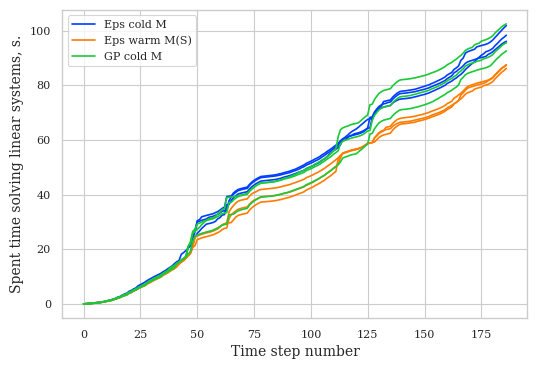

In [14]:
color_iter = -1
plt.figure(figsize=(6, 4))
for name, values in data.items():
    results = [
        sum_per_time_step(
            make_solve_linear_system_time(perf, converged=CONVERGED),
            perf,
            converged=CONVERGED,
        )
        for perf in values
    ]
    color_iter += 1
    make_label = True
    total = []
    for result in results:
        result = np.cumsum(result)
        total.append(result[-1])
        if make_label:
            plt.plot(result, color=f"C{color_iter}", label=name)
            make_label = False
        else:
            plt.plot(result, color=f"C{color_iter}")
    print(name, np.mean(total), np.max(total) - np.min(total))

plt.legend()
plt.xlabel("Time step number")
plt.ylabel("Spent time solving linear systems, s.")

if save_media_path is not None:
    plt.savefig(save_media_path / "thermal_performance.pdf", bbox_inches="tight")

Eps cold M 98.77329246203105 5.762976169586182
Eps warm M(S) 87.04543749491374 1.334491491317749
GP cold M 96.89704426129659 9.851627588272095


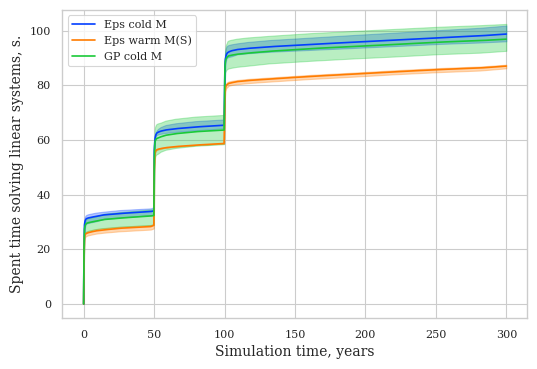

In [15]:
DAY = 24 * 60 * 60
YEAR = 365 * DAY


color_iter = -1
plt.figure(figsize=(6, 4))
time_best = float('inf')
for name, values in data.items():
    results = []
    times = []
    color_iter += 1

    for perf in values:
        results.append(
            np.cumsum(
                sum_per_time_step(
                    make_solve_linear_system_time(perf, converged=CONVERGED),
                    perf,
                    converged=CONVERGED,
                )
            )
        )
        times.append(make_simulation_time(perf, converged=CONVERGED))

    total = []
    t_end = []
    interp_data_list = []
    x_space = np.linspace(times[0][0], times[0][-1], 1000)
    for time, result in zip(times, results):
        total.append(result[-1])
        t_end.append(time[-1])

        interp_data_list.append(np.interp(x_space, time, result))

    interp_data = np.array(interp_data_list)
    max_ = np.max(interp_data, axis=0)
    min_ = np.min(interp_data, axis=0)
    mean = np.mean(interp_data, axis=0)
    if result[-1] < time_best:
        best = mean
        time_best = result[-1]
        best_name = name
    x_space /= YEAR
    # x_space = np.arange(mean)
    plt.fill_between(x_space, min_, max_, color=f"C{color_iter}", alpha=0.3)
    plt.plot(x_space, mean, color=f"C{color_iter}", label=name)
    print(name, np.mean(total), np.max(total) - np.min(total))
    assert np.allclose(t_end, t_end[0], rtol=1e-10)

plt.legend()
plt.xlabel("Simulation time, years")
plt.ylabel("Spent time solving linear systems, s.")

if save_media_path is not None:
    plt.savefig(save_media_path / "thermal_performance.pdf", bbox_inches="tight")

Eps cold M 98.77329246203105 5.762976169586182
Eps warm M(S) 87.04543749491374 1.334491491317749
GP cold M 96.89704426129659 9.851627588272095


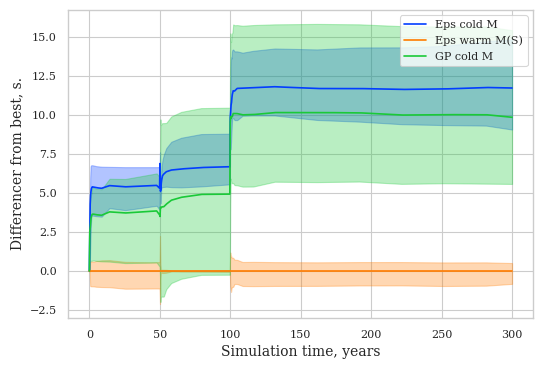

In [16]:
DAY = 24 * 60 * 60
YEAR = 365 * DAY


color_iter = -1
plt.figure(figsize=(6, 4))
for name, values in data.items():
    results = []
    times = []
    color_iter += 1

    for perf in values:
        results.append(
            np.cumsum(
                sum_per_time_step(
                    make_solve_linear_system_time(perf, converged=CONVERGED),
                    perf,
                    converged=CONVERGED,
                )
            )
        )
        times.append(make_simulation_time(perf, converged=CONVERGED))

    total = []
    t_end = []
    interp_data_list = []
    x_space = np.linspace(times[0][0], times[0][-1], 1000)
    for time, result in zip(times, results):
        total.append(result[-1])
        t_end.append(time[-1])

        interp_data_list.append(np.interp(x_space, time, result))

    interp_data = np.array(interp_data_list)
    max_ = np.max(interp_data, axis=0) - best
    min_ = np.min(interp_data, axis=0) - best
    mean = np.mean(interp_data, axis=0) - best
    x_space /= YEAR
    plt.fill_between(x_space, min_, max_, color=f"C{color_iter}", alpha=0.3)
    plt.plot(x_space, mean, color=f"C{color_iter}", label=name)
    print(name, np.mean(total), np.max(total) - np.min(total))
    assert np.allclose(t_end, t_end[0], rtol=1e-10)

plt.legend()
plt.xlabel("Simulation time, years")
plt.ylabel("Differencer from best, s.")

if save_media_path is not None:
    plt.savefig(save_media_path / "thermal_performance.pdf", bbox_inches="tight")

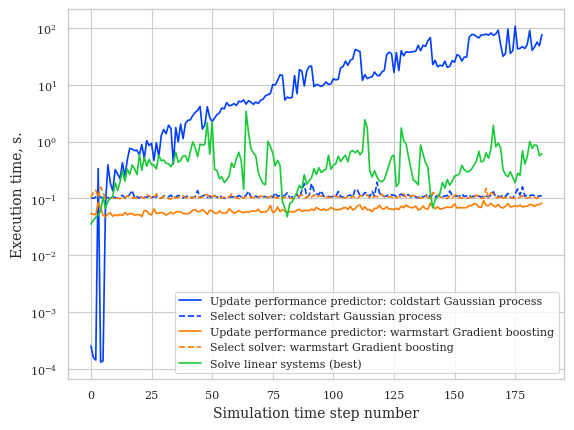

In [20]:
metrics = {
    "coldstart Gaussian process": np.load('performance/thermal_coldstart_m_gp_7_metrics.npy', allow_pickle=True).item(),
    "warmstart Gradient boosting": np.load('../2/performance/thermal_warmstart_m_s_7_metrics.npy', allow_pickle=True).item(),
}

fig = plt.figure()
for i, (name, metric) in enumerate(metrics.items()):
    plt.plot(
        metric["update_selector_times"],
        label=f"Update performance predictor: {name}",
        color=f"C{i}",
    )
    plt.plot(
        metric["select_solver_times"],
        label=f"Select solver: {name}",
        color=f"C{i}",
        linestyle="--",
    )

solve_best_time = sum_per_time_step(
    make_solve_linear_system_time(data[best_name][0], converged=CONVERGED),
    data[best_name][0],
    converged=CONVERGED,
)
plt.plot(solve_best_time, label="Solve linear systems (best)", color=f"C{i+1}")
plt.yscale("log")
plt.ylabel("Execution time, s.")
plt.xlabel("Simulation time step number")
# fig.legend(loc="center", bbox_to_anchor=(0.5, -.1))
plt.legend(loc="lower right")
# plt.ylim(bottom=1e-2)

Eps cold M
0


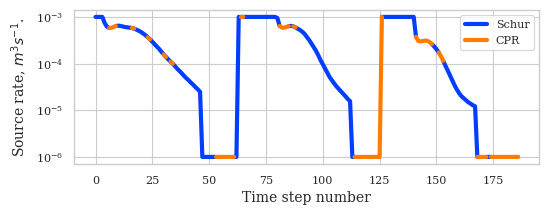

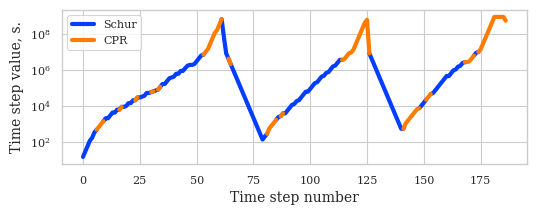

1


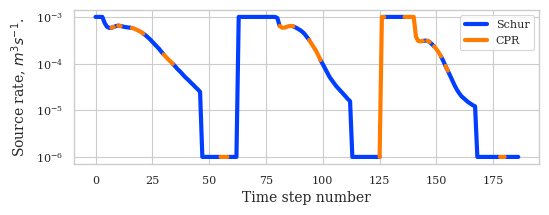

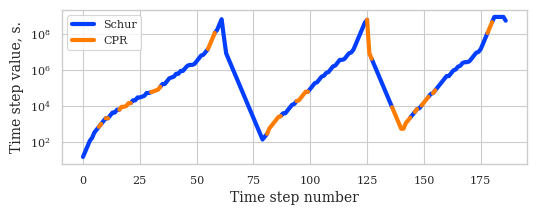

2


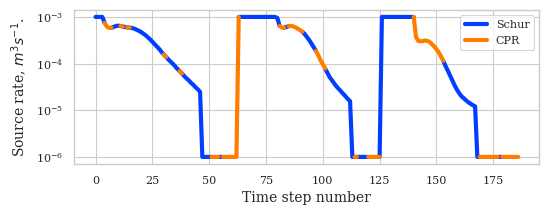

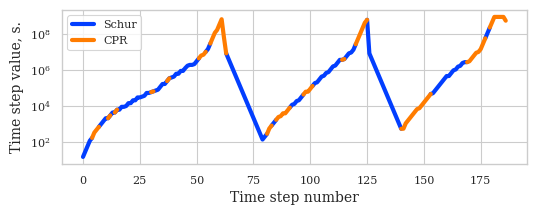

Eps warm M(S)
0


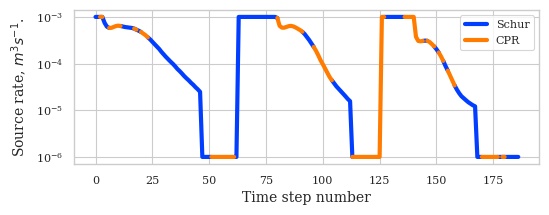

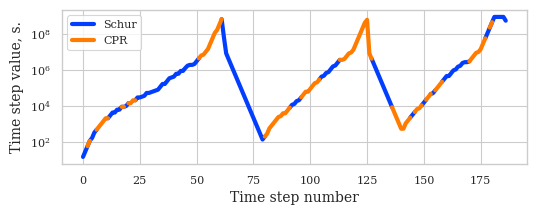

1


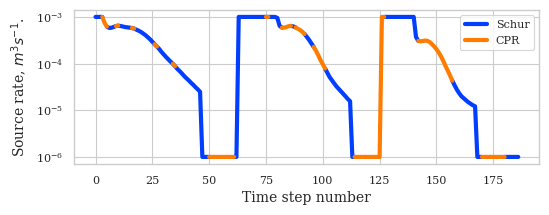

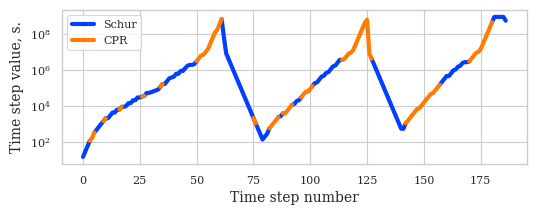

2


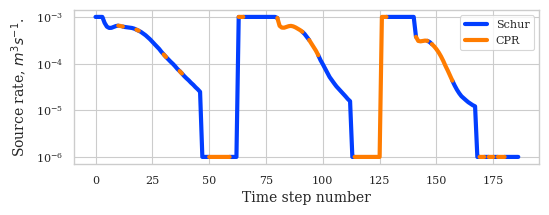

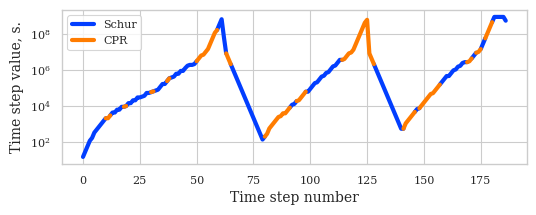

GP cold M
0


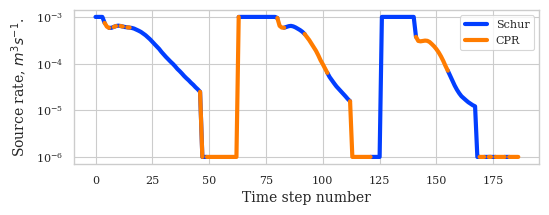

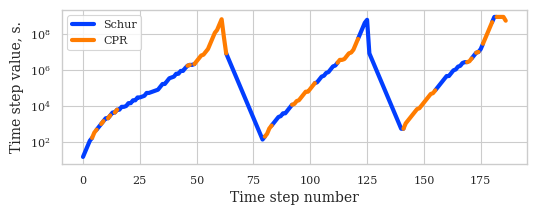

1


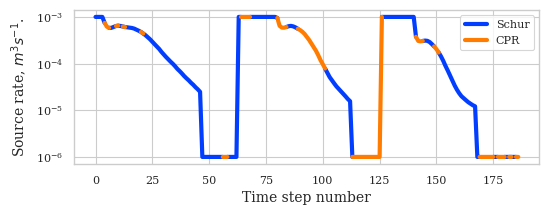

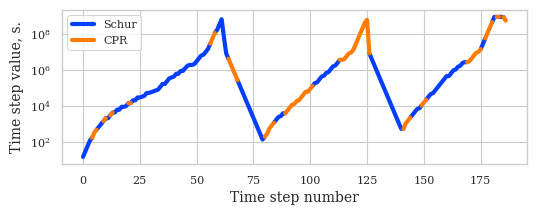

2


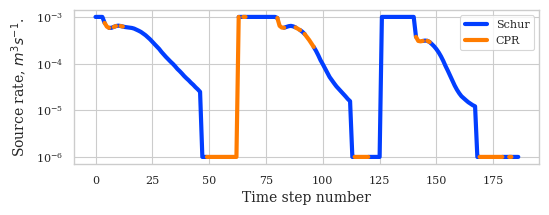

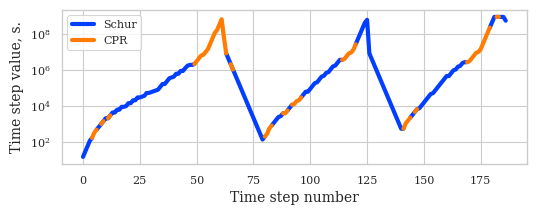

In [18]:
def color_using_schur(using_schur, values, x=None):
    using_schur = np.array(using_schur).copy()
    using_cpr = ~using_schur
    using_schur[1:] += using_schur[:-1]
    using_schur[:-1] += using_schur[1:]
    lw = 3
    if x is None:
        x = np.arange(values.size)
    plt.plot(x, np.where(using_schur, values, None), label="Schur", linewidth=lw)
    plt.plot(x, np.where(using_cpr, values, None), label="CPR", linewidth=lw)
    plt.legend()


def make_using_schur_indices(perf: Sequence[SolverSelectionData], converged=True):
    using_schur = np.array(
        ["schur_cd" in data.config["gmres"]["preconditioner"] for data in perf]
    )
    if converged:
        return using_schur[make_converged_indices(perf)]
    return using_schur


def plot_characteristics_color_schur(perf):
    using_schur = make_using_schur_indices(perf, converged=CONVERGED)
    time_step = make_time_step(perf, converged=CONVERGED)
    inlet_rate = make_inlet_rate(perf, converged=CONVERGED)
    # x = make_simulation_time(perf, converged=CONVERGED)
    x = None

    plt.figure(figsize=(6, 2))
    color_using_schur(using_schur, inlet_rate, x)
    plt.ylabel("Source rate, $m^3 s^{-1}$.")
    plt.xlabel("Time step number")
    plt.yscale("log")
    if save_media_path is not None:
        plt.savefig(save_media_path / "thermal_source.pdf", bbox_inches="tight")

    plt.figure(figsize=(6, 2))
    plt.ylabel("Time step value, s.")
    plt.xlabel("Time step number")
    color_using_schur(using_schur, time_step, x)
    plt.yscale("log")
    if save_media_path is not None:
        plt.savefig(save_media_path / "thermal_dt.pdf", bbox_inches="tight")


for name, vals in data.items():
    print(name)
    for i, perf in enumerate(vals):
        print(i)
        plot_characteristics_color_schur(perf)
        plt.show()